In [16]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [17]:
train_dir = "C:/Users/sanjeev kumar/Downloads/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/trainingData"
val_dir = "C:/Users/sanjeev kumar/Downloads/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/trainingData"

In [20]:
#Preprocess Data Efficiently
IMG_SIZE = 64  # Keep small for faster training
BATCH_SIZE = 32  

train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Check class count
NUM_CLASSES = len(train_data.class_indices)
print(f"Number of Classes: {NUM_CLASSES}")  


Found 12846 images belonging to 27 classes.
Found 12846 images belonging to 27 classes.
Number of Classes: 27


In [21]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model (to speed up training)
base_model.trainable = False  

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),  # Prevent overfitting
    Dense(NUM_CLASSES, activation="softmax") 
])

# Compile the model with Adam optimizer (fast & effective)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()


C:\Users\sanjeev kumar\AppData\Local\Temp\ipykernel_27796\1546561213.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 2, 2, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         655,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 27)                  │           3,483 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,916,955 (11.13 MB)

 Trainable params: 658,971 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
checkpoint = ModelCheckpoint("Models/best_model.weights.h5", monitor="val_accuracy", save_best_only=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    callbacks=[checkpoint]
)


Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.5452 - loss: 1.5353

402/402 ━━━━━━━━━━━━━━━━━━━━ 114s 270ms/step - accuracy: 0.5456 - loss: 1.5340 - val_accuracy: 0.8084 - val_loss: 0.5920
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.8177 - loss: 0.5629

402/402 ━━━━━━━━━━━━━━━━━━━━ 109s 271ms/step - accuracy: 0.8177 - loss: 0.5628 - val_accuracy: 0.8230 - val_loss: 0.4981
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.8540 - loss: 0.4318

402/402 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.8540 - loss: 0.4318 - val_accuracy: 0.8723 - val_loss: 0.3732
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8730 - loss: 0.3841

402/402 ━━━━━━━━━━━━━━━━━━━━ 63s 157ms/step - accuracy: 0.8730 - loss: 0.3841 - val_accuracy: 0.8788 - val_loss: 0.3597
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8833 - loss: 0.3501

402/402 ━━━━━━━━━━━━━━━━━━━━ 61s 151ms/step - accuracy: 0.8833 - loss: 0.3501 - val_accuracy: 0.8863 - val_loss: 0.3346
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 59s 147ms/step - accuracy: 0.8926 - loss: 0.3272 - val_accuracy: 0.8523 - val_loss: 0.4325
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.8955 - loss: 0.3087 - val_accuracy: 0.8591 - val_loss: 0.4279
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9030 - loss: 0.2909

402/402 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.9030 - loss: 0.2910 - val_accuracy: 0.8884 - val_loss: 0.3254
Epoch 9/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 57s 143ms/step - accuracy: 0.8995 - loss: 0.3021 - val_accuracy: 0.8845 - val_loss: 0.3270
Epoch 10/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.9013 - loss: 0.2904 - val_accuracy: 0.8821 - val_loss: 0.3326


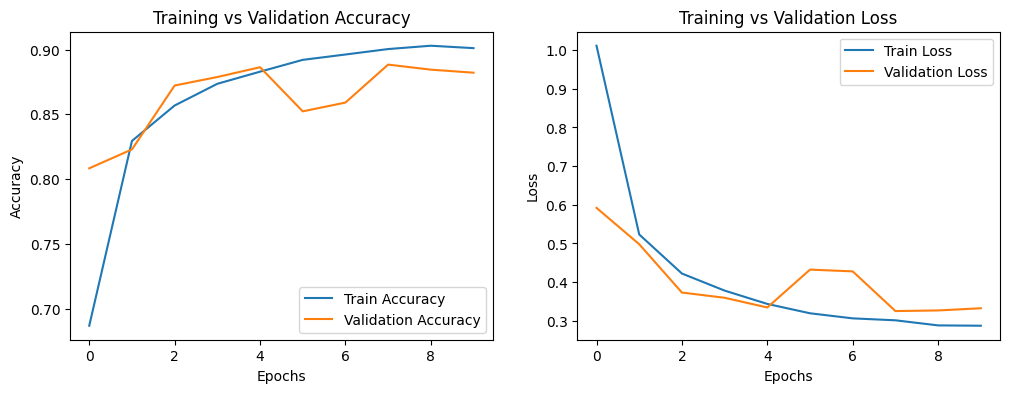

In [23]:
import matplotlib.pyplot as plt

def plot_training(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training vs Validation Accuracy")

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")

    plt.show()

plot_training(history)


In [24]:
model.save("Models/final_model.keras")

# Save class labels
import json
with open("Models/class_labels.json", "w") as f:
    json.dump(train_data.class_indices, f)


In [29]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load model and labels
model = load_model("Models/final_model.keras")

with open("Models/class_labels.json", "r") as f:
    class_labels = json.load(f)

# Reverse class labels dictionary
class_labels = {v: k for k, v in class_labels.items()}

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return class_labels[class_idx]  # Get class name

# Test with an example image
image_path = "C:/Users/sanjeev kumar/Downloads/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/trainingData/A/1.jpg" 
prediction = predict_image(image_path)
print("Predicted Sign:", prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
Predicted Sign: A
